## Machine Learning Test

This file serves as a testing grounds for different methods of machine learning. The most sucessful model will be incorparted into the actual machine elarning portion of the application.

Methods to be tested: 
Linear Regression
Logistic Regression
Random Forest


Based off of worked conducted by myself and Harry O'Cleirigh in Data Analytics Homework 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from graphviz import Source
from IPython.display import Image
import pydotplus
import pickle
import xgboost as xgb
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import math

#data for task 1
df = pd.read_csv('C:/Users/mattx/Downloads/data/cleaned data/ml_ready_df.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

#70/30 train test split on data
train, test = train_test_split(df, test_size = 0.3, random_state=42)

In [2]:
#checking once more for duplicates and missing data

df.duplicated().sum()

#no duplicates 

full = list(df)

for item in full:
    percent_missing = df[item].isnull().sum() * 100 / len(df)
    print(f'{item}: {percent_missing}')
    
#no missing data

day: 0.0
month: 0.0
year: 0.0
hour: 0.0
week: 0.0
taxi_zone: 0.0
temp: 0.0
feels_like: 0.0
weather_main: 0.0
activity: 0.0


In [3]:
train.shape

(354695, 10)

In [4]:
test.shape

(152013, 10)

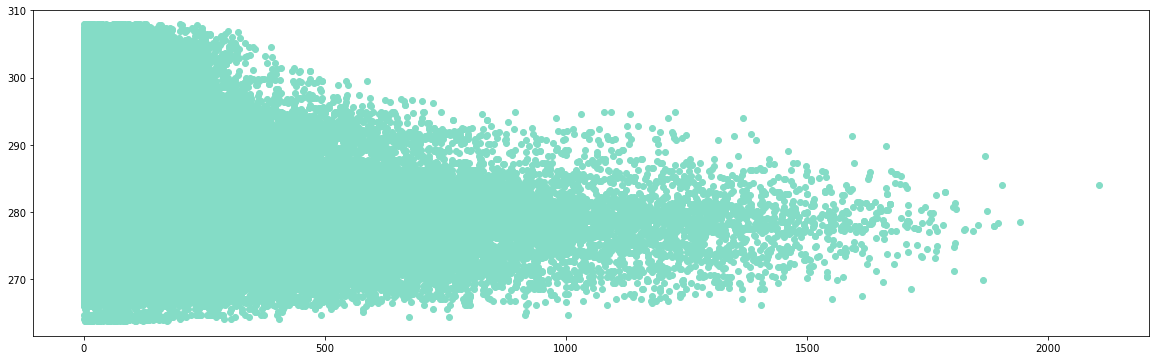

In [5]:
#Plotting dependent variable (activity) and continuous feature temp

fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['activity'], train['temp'], c='#84dcc6')
plt.show()

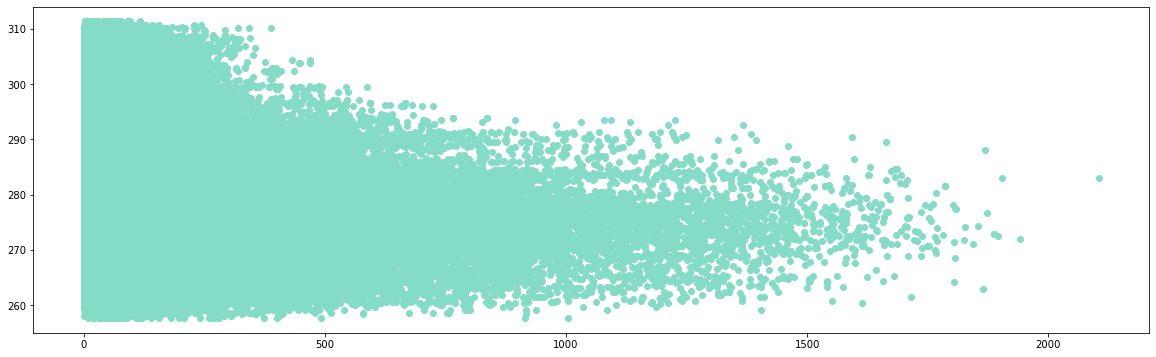

In [6]:
#Plotting dependent variable (activity) and continuous feature feels_like

fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['activity'], train['feels_like'], c='#84dcc6')
plt.show()

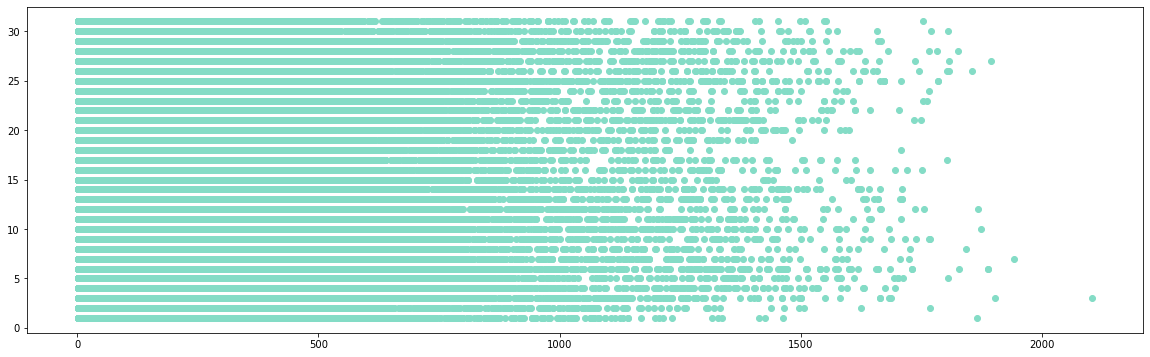

In [7]:
#Plotting dependent variable (activity) and categroical feature day

fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['activity'], train['day'], c='#84dcc6')
plt.show()

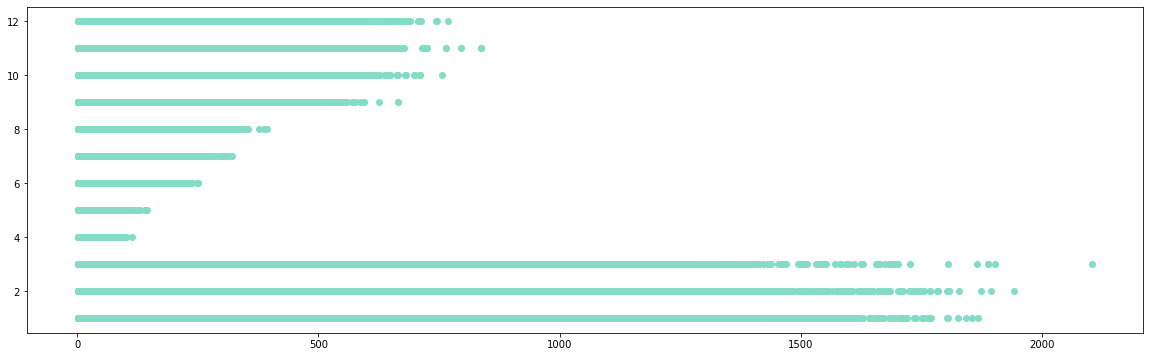

In [8]:
#Plotting dependent variable (activity) and categroical feature month

fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['activity'], train['month'], c='#84dcc6')
plt.show()

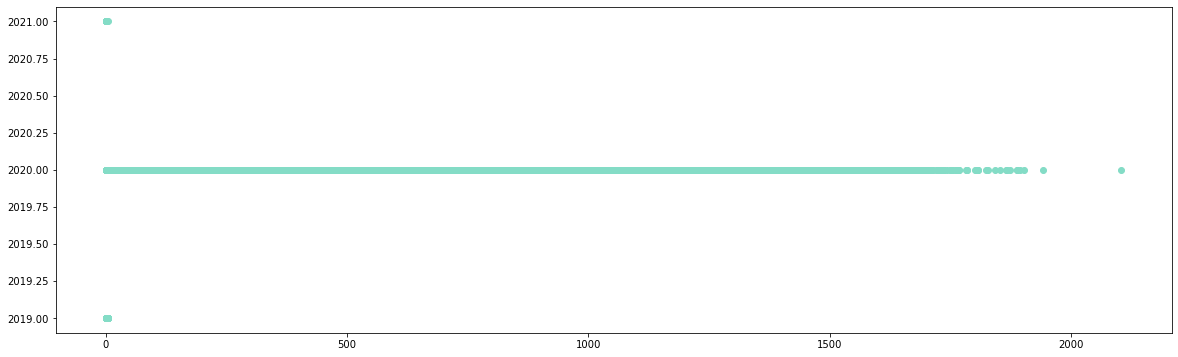

In [9]:
#Plotting dependent variable (activity) and categroical feature year

fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['activity'], train['year'], c='#84dcc6')
plt.show()

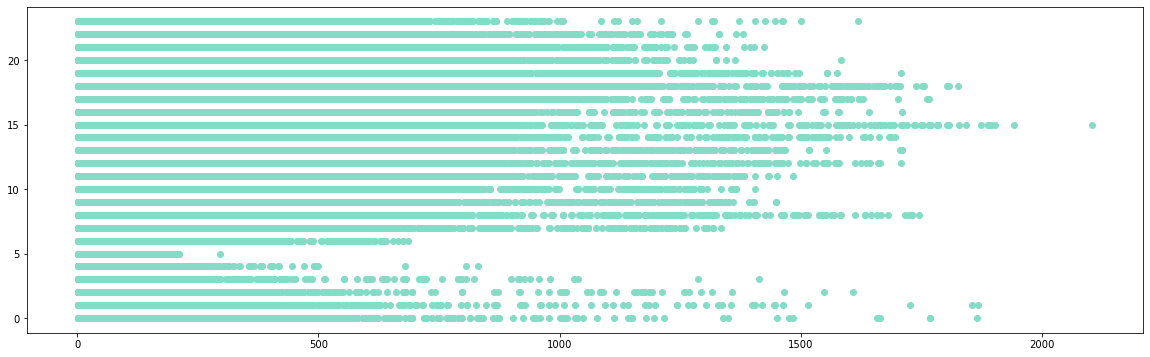

In [10]:
#Plotting dependent variable (activity) and categroical feature hour

fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['activity'], train['hour'], c='#84dcc6')
plt.show()

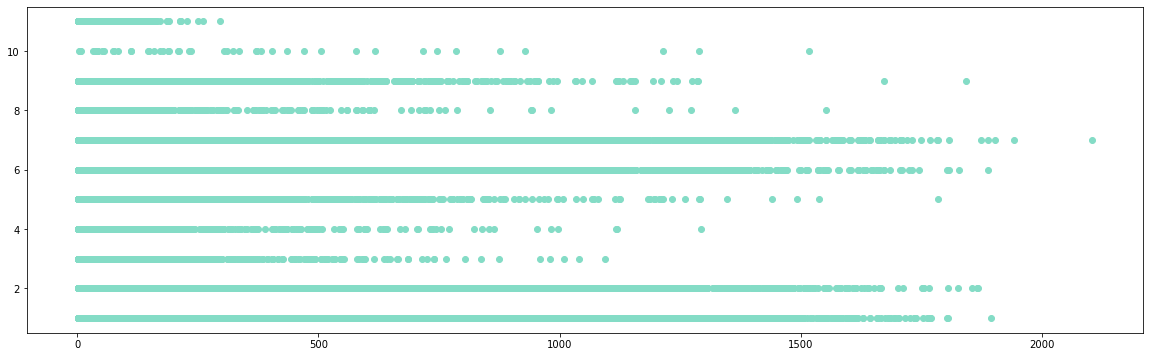

In [11]:
#Plotting dependent variable (activity) and categroical weather_main
#weather key: 'Clear':1, 'Clouds':2, 'Drizzle': 3, 'Fog':4, 'Haze': 5, 'Mist':6, 'Rain': 7, 'Smoke': 8, 'Snow': 9, 'Squall': 10, 'Thunderstorm': 11

fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['activity'], train['weather_main'], c='#84dcc6')
plt.show()

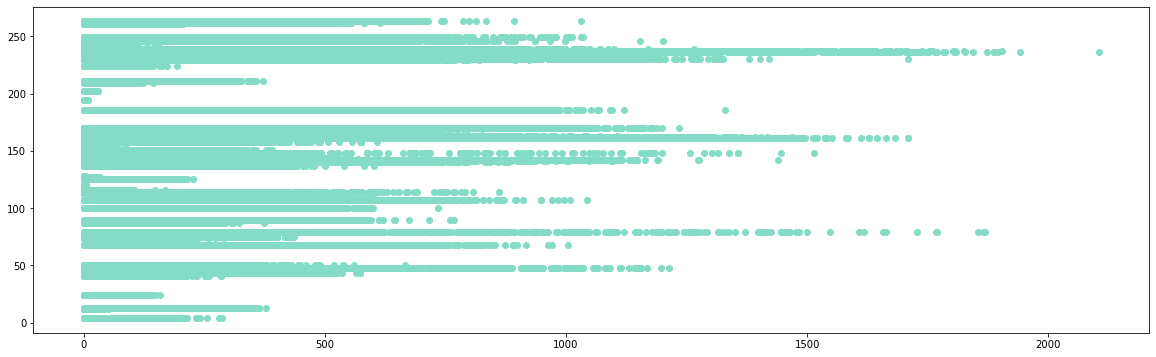

In [12]:
#Plotting dependent variable (activity) and categroical taxi_zone

fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['activity'], train['taxi_zone'], c='#84dcc6')
plt.show()

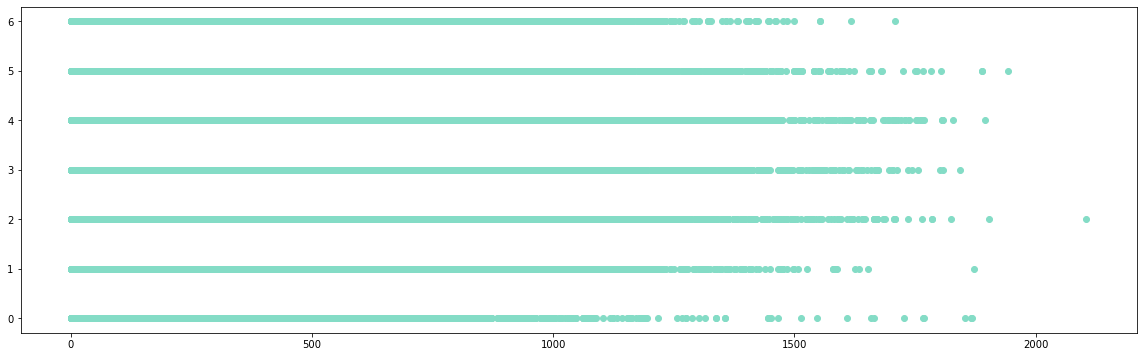

In [13]:
#Plotting dependent variable (activity) and categroical week

fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['activity'], train['week'], c='#84dcc6')
plt.show()

## Linear Regression Model

dependent feature: activity
independent features: day, month, week, hour, temp, feels_like, weather_main, taxi_zone

In [5]:
#Training and testing data

linear_regression_x_train = train[['day', 'month', 'week', 'hour', 'temp', 'feels_like', 'weather_main', 'taxi_zone']]
linear_regression_y_train = train['activity']

linear_regression_x_test = test[['day', 'month', 'week', 'hour', 'temp', 'feels_like', 'weather_main', 'taxi_zone']]
linear_regression_y_test = test['activity']

In [6]:
#creating the model based on training data

lr = LinearRegression()
lr.fit(linear_regression_x_train, linear_regression_y_train)

LinearRegression()

In [7]:
#printing coefficitens for indpendent features

lr_coeff = pd.DataFrame({'Feature': linear_regression_x_train.columns, 'Coeff': lr.coef_})
lr_coeff.reset_index(drop=True, inplace=True)
lr_coeff

,Feature,Coeff
0,day,-0.399015
1,month,-6.694093
2,week,1.244325
3,hour,2.912329
4,temp,-1.902059
5,feels_like,-0.140564
6,weather_main,0.408522
7,taxi_zone,0.199208


### Observations: 

day: We can see a weak negative correlation between day and the activity in a given taxi zone. This means that as the month goes on, the number of taxi rides decreases. The reason for this is unkown, as common sense would indicate that taxi rides would remain stable throughout the month. Perhaps this weak negtive correlation is indicative of the weekday/weekend dichotomy, with weekends potentially being later in the month

month: There is a negative correlation between taxi trips and the month. This tracks, as the highest months are associated with colder weather, and therefore less movement, when compared to the warmer middle months

week: We can see a positive correlation between week and activity. As it gets closer to the top end (thursday, friday, saturday), the number of trips increases

hour: We can see a positive corelation between hour and activity. This makes intuitive sense, as people are likely taking taxis are probably doing so in the evening

temp: There is a negative correlation between temperature and activity, as expected. This indicates that people tend to take more taxis when the weather is colder

feels_like: Similar to temperature. This variable is simply to give the model some input for when the teperature and "feel" are different, such as a very humid day

weather main: Weak positive correlation. The higher mapped numbers for weather correlate with more extreme conditions, which is the likely cause for this result

taxi_zone: Weak positive correlation. The higher taxi zones are likely slightly more popular than the lower number taxi zones, as there is a glut of higher numbered zones around downtown

In [43]:
# predict target feature values for first 10 training examples
linear_regression_y_train_pred_10 = lr.predict(linear_regression_x_train[:10])
y_train_pred_df = pd.DataFrame({'Predicted target feature values': linear_regression_y_train_pred_10, 'Actual Values': linear_regression_y_train.head(10)})

print(y_train_pred_df)

        Predicted target feature values  Actual Values
221310                        53.077289            1.0
50819                         41.660554            2.0
354798                        24.809236            3.0
766110                        49.993728           26.0
805676                        89.296066           62.0
253233                         3.577381            1.0
373797                        68.556474            6.0
272629                        74.354743            7.0
168776                        84.387359           43.0
36488                        134.337818         1135.0


In [36]:
#Calculating MSE

y_pred = lr.predict(linear_regression_x_test)

mse = mean_squared_error(linear_regression_y_test, y_pred, squared=False)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 124.55082251832147


In [10]:
#Calculate MAE

mae = mean_absolute_error(linear_regression_y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 65.75756655045905


In [11]:
#Calculating r2

r2 = r2_score(linear_regression_y_test, y_pred)
print("R-squared (R²) score:", r2)

R-squared (R²) score: 0.09729983179801982


In [12]:
#Calculating Mean absolute percentage error

mape = mean_absolute_percentage_error(linear_regression_y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) score:", mape)

Mean Absolute Percentage Error (MAPE) score: 10.968155102846591


### Metrics

The linear regression model perfomed very poorly for this dataset. The MSE was 1500+ which is very high for the scale of the numbers that we are working with. The MAE was around 65, indicating that the model was predicting the wrong number of pickups and dropoffs the a very high degree. The r2 score was around .09 on a 0 to 1 scale, indicating that the model was rarely a good fit. This bodes generally poorly for linear regression, and other options should be explored if they are feasible

## Neural Network Model

dependent feature: activity
independent features: day, month, year, hour, temp, feels_like, weather_main, taxi_zone

In [13]:
#Training and testing data

nn_x_train = train[['day', 'month', 'week', 'hour', 'temp', 'feels_like', 'weather_main', 'taxi_zone']]
nn_y_train = train['activity']

nn_x_test = test[['day', 'month', 'week', 'hour', 'temp', 'feels_like', 'weather_main', 'taxi_zone']]
nn_y_test = test['activity']

In [14]:
#generating the random forest model

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(nn_x_train, nn_y_train)

In [15]:
#Calculating MSE

y_pred = mlp.predict(nn_x_test)

mse = mean_squared_error(nn_y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 19656.266324950437


In [16]:
mae = mean_absolute_error(nn_y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 50.076728335596464


In [17]:
r2 = r2_score(nn_y_test, y_pred)
print("R-squared (R²) score:", r2)

R-squared (R²) score: -0.1438033162761403


In [18]:
#Calculating Mean absolute percentage error

mape = mean_absolute_percentage_error(nn_y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) score:", mape)

Mean Absolute Percentage Error (MAPE) score: 0.7101571875845981


In [19]:
pickle.dump(mlp, open('nnmodel.pkl', 'wb'))

## Random Forest Model

dependent feature: activity
independent features: day, month, year, hour, temp, feels_like, weather_main, taxi_zone

In [22]:
#Testing and training data

random_forest_x_train = train[['day', 'month', 'week', 'hour', 'temp', 'feels_like', 'weather_main', 'taxi_zone']]
random_forest_y_train = train['activity']

random_forest_x_test = test[['day', 'month', 'week', 'hour', 'temp', 'feels_like', 'weather_main', 'taxi_zone']]
random_forest_y_test = test['activity']

In [53]:
#generating the model

rfc = RandomForestClassifier(n_estimators=200, random_state=42, max_depth = 9)
rfc.fit(random_forest_x_train, random_forest_y_train)
random_forest_y_pred = rfc.predict(random_forest_x_test)

In [58]:
#Calculating MSE

y_pred = rfc.predict(random_forest_x_test)

mse = mean_squared_error(random_forest_y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 19640.845576703676


In [59]:
#Calculating MAE

mae = mean_absolute_error(random_forest_y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 50.030277723893725


In [60]:
#Calculating r2

r2 = r2_score(random_forest_y_test, y_pred)
print("R-squared (R²) score:", r2)

R-squared (R²) score: -0.14290597887276402


In [61]:
#Calculating Mean absolute percentage error

mape = mean_absolute_percentage_error(random_forest_y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE) score:", mape)

Mean Absolute Percentage Error (MAPE) score: 0.703966252570936


## XGBoost

Dependent feature: activity 

Independent features: day, month, week, hour, temp, feels_like, weather_main, taxi_zone

In [14]:
#Testing and training data

xgb_x_train = train[['day', 'month', 'week', 'hour', 'temp', 'feels_like', 'weather_main', 'taxi_zone']]
xgb_y_train = train['activity']

xgb_x_test = test[['day', 'month', 'week', 'hour', 'temp', 'feels_like', 'weather_main', 'taxi_zone']]
xgb_y_test = test['activity']

In [15]:
#creating xgboost regression models

dtrain_reg = xgb.DMatrix(xgb_x_train, xgb_y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(xgb_x_test, xgb_y_test, enable_categorical=True)

In [16]:
#defining parameters and training

params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 10000

evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]
         
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
    verbose_eval=250,
    early_stopping_rounds=50
)

[0]	train-rmse:158.13256	validation-rmse:157.66488
[250]	train-rmse:34.22279	validation-rmse:36.74255
[500]	train-rmse:28.42599	validation-rmse:32.12345
[750]	train-rmse:25.15168	validation-rmse:29.70222
[1000]	train-rmse:23.07747	validation-rmse:28.33403
[1250]	train-rmse:21.60896	validation-rmse:27.39119
[1500]	train-rmse:20.41886	validation-rmse:26.73302
[1750]	train-rmse:19.44350	validation-rmse:26.17037
[2000]	train-rmse:18.60191	validation-rmse:25.73772
[2250]	train-rmse:17.92064	validation-rmse:25.44712
[2500]	train-rmse:17.28700	validation-rmse:25.17306
[2750]	train-rmse:16.70048	validation-rmse:24.93738
[3000]	train-rmse:16.19357	validation-rmse:24.71919
[3250]	train-rmse:15.75023	validation-rmse:24.57095
[3500]	train-rmse:15.31023	validation-rmse:24.40925
[3750]	train-rmse:14.92607	validation-rmse:24.28098
[4000]	train-rmse:14.56450	validation-rmse:24.17171
[4250]	train-rmse:14.21530	validation-rmse:24.06636
[4500]	train-rmse:13.92036	validation-rmse:23.97799
[4750]	train-rms

In [17]:
#predicting 

preds = model.predict(dtest_reg)

In [18]:
#testing RMSE of model

rmse = mean_squared_error(xgb_y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 23.391


In [19]:
dmatrix = xgb.DMatrix(data=xgb_x_train[:10])

predictions = model.predict(dmatrix)

y_train_pred_df = pd.DataFrame({'Predicted target feature values': predictions, 'Actual Values': xgb_y_train.head(10)})
print(y_train_pred_df)

        Predicted target feature values  Actual Values
194673                         5.030985            4.0
311124                       140.610870          145.0
102162                       235.370636          235.0
365165                        42.995491           36.0
424447                        80.705925           70.0
139016                        25.350189           20.0
322495                        40.390453           43.0
206421                        -0.897131            5.0
351578                        27.772057            9.0
267710                       101.539795           83.0
